<a href="https://githubtocolab.com/gee-community/geemap/blob/master/docs/notebooks/69_cartoee_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

**Plotting Earth Engine vector data with cartoee**

Uncomment the following line to install [geemap](https://geemap.org) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/installing.html#installing) if needed. Keep in mind that cartopy can be challenging to install. If you are unable to install cartopy on your computer, you can try Google Colab with this the [notebook example](https://colab.research.google.com/github/gee-community/geemap/blob/master/docs/notebooks/69_cartoee_vector.ipynb). 

See below the commands to install cartopy and geemap using conda/mamba:

```
conda create -n carto python=3.8
conda activate carto
conda install cartopy scipy -c conda-forge
conda install geemap -c conda-forge
jupyter notebook
```

In [ ]:
# !pip install cartopy scipy
# !pip install geemap

In [1]:
import ee
import geemap
from geemap import cartoee
from geemap.datasets import DATA
import geemap.colormaps as cmap
import cartopy.crs as ccrs

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Plot a simple vector

In [3]:
Map = geemap.Map()

features = ee.FeatureCollection(DATA.users_giswqs_public_countries)

style = {"color": "000000ff", "width": 1, "lineType": "solid", "fillColor": "0000ff40"}

Map.addLayer(features.style(**style), {}, "Polygons")
Map.setCenter(-14.77, 34.70, 2)
Map

Map(center=[34.7, -14.77], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [4]:
# specify region to focus on
bbox = [180, -88, -180, 88]

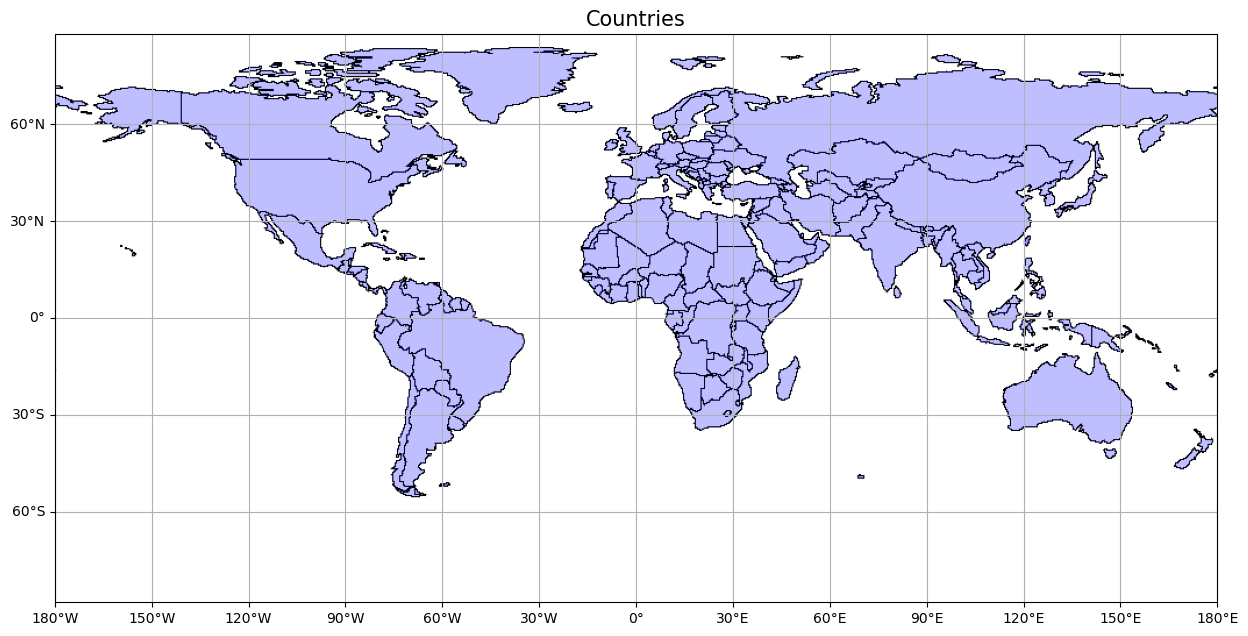

In [5]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(features, region=bbox, style=style)
ax.set_title(label="Countries", fontsize=15)
cartoee.add_gridlines(ax, interval=30)

plt.show()

![](https://i.imgur.com/RTFGotE.png)

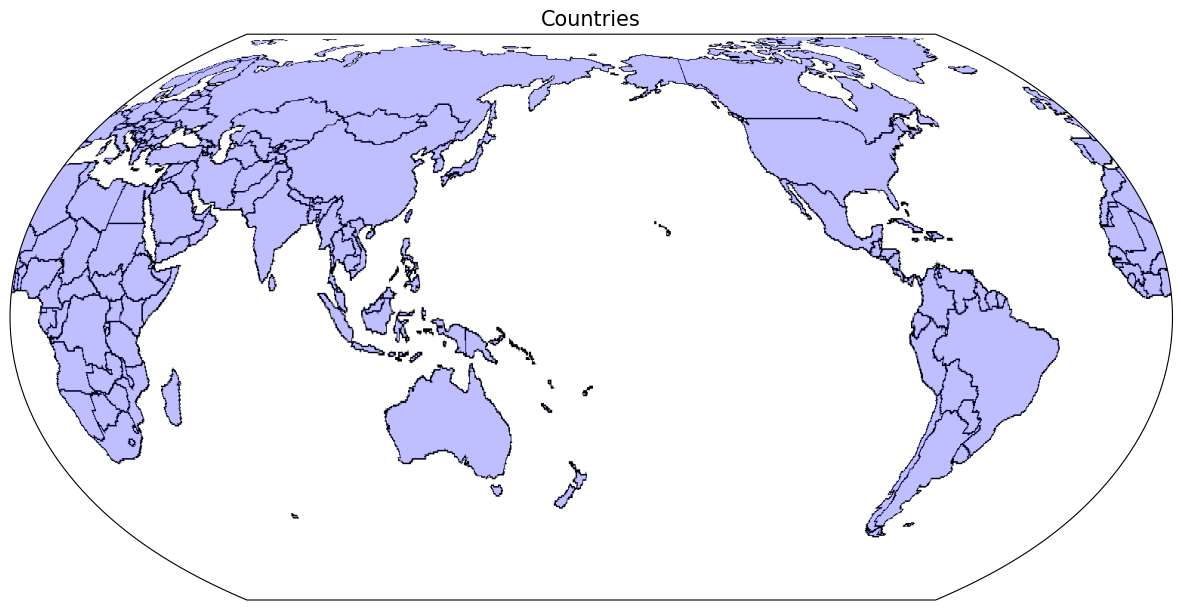

In [6]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.EqualEarth(central_longitude=-180)
ax = cartoee.get_map(features, region=bbox, proj=projection, style=style)
ax.set_title(label="Countries", fontsize=15)

plt.show()

![](https://i.imgur.com/GagRINK.png)

## Plot a styled vector

In [7]:
Map = geemap.Map()

features = ee.FeatureCollection(DATA.users_giswqs_public_countries)

palette = cmap.palettes.gist_earth
features_styled = geemap.vector_styling(features, column="name", palette=palette)

Map.add_styled_vector(features, column="name", palette=palette, layer_name="Polygon")
Map.setCenter(-14.77, 34.70, 2)
Map

ValueError: The column name must of one of GDP_MD_EST, ISO_A2, POP_RANK, ISO_A3, CONTINENT, POP_EST, INCOME_GRP, SUBREGION, system:index, NAME

In [8]:
bbox = [180, -88, -180, 88]
fig = plt.figure(figsize=(15, 10))

ax = cartoee.get_map(features_styled, region=bbox)
ax.set_title(label="Countries", fontsize=15)
cartoee.add_gridlines(ax, interval=30)

plt.show()

NameError: name 'features_styled' is not defined

<Figure size 1500x1000 with 0 Axes>

![](https://i.imgur.com/reecFZo.png)

In [ ]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.EqualEarth(central_longitude=-180)
ax = cartoee.get_map(features_styled, region=bbox, proj=projection)
ax.set_title(label="Countries", fontsize=15)

plt.show()

![](https://i.imgur.com/uW9p8vS.png)